# MNIST Digits Classification Using Deep Learning (Neural Network)

## Importing Dependencies

In [1]:
import gradio as gr
from gradio import components
import numpy as np  # Import numpy library for numerical computing
import pandas as pd # pandas for creating dataframe
import matplotlib.pyplot as plt  # Import matplotlib library for data visualization
import seaborn as sns  # Import seaborn library for enhanced data visualization
from PIL import Image  # Import PIL library for image manipulation
import cv2  # Import OpenCV library for computer vision tasks
import tensorflow as tf  # Import TensorFlow library for deep learning
from tensorflow import keras  # Import Keras, a high-level API for TensorFlow
from keras.datasets import mnist  # Import MNIST dataset from Keras
from tensorflow.math import confusion_matrix  # Import confusion_matrix function from TensorFlow math module
tf.random.set_seed(5)  # Set random seed for reproducibility of random operations
import random  # Import random module for additional random operations

## Loading the MNIST dataset from keras.datasets

In [2]:
# loading the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
# print the type of data
print(f"X_train type - {type(X_train)}")
print(f"Y_train type - {type(Y_train)}")
print(f"X_test type - {type(X_test)}")
print(f"Y_test type - {type(Y_test)}")

X_train type - <class 'numpy.ndarray'>
Y_train type - <class 'numpy.ndarray'>
X_test type - <class 'numpy.ndarray'>
Y_test type - <class 'numpy.ndarray'>


In [4]:
# print the shape of the numpy arrays
print(f"X_train shape - {X_train.shape}")
print(f"Y_train shape - {Y_train.shape}")
print(f"X_test shape - {X_test.shape}")
print(f"Y_test shape - {Y_test.shape}")

X_train shape - (60000, 28, 28)
Y_train shape - (60000,)
X_test shape - (10000, 28, 28)
Y_test shape - (10000,)


Training data --> 60,000 Images

Testing data --> 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [5]:
# checking the feature numpy array
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

## Displaying Some random feature images with their corresponding output

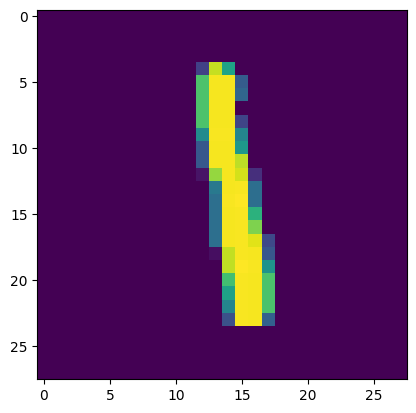

Output : 1


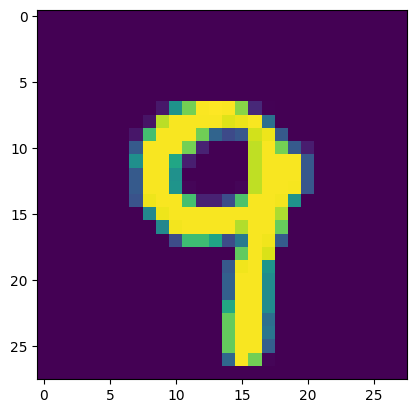

Output : 9


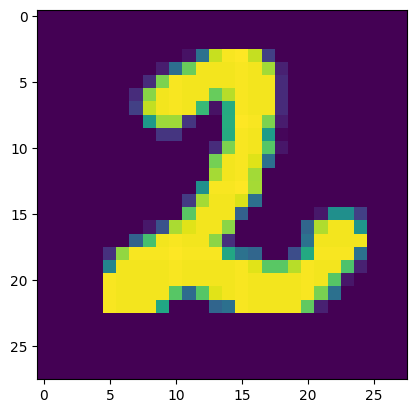

Output : 2


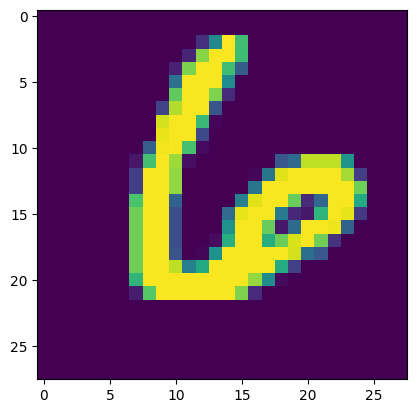

Output : 6


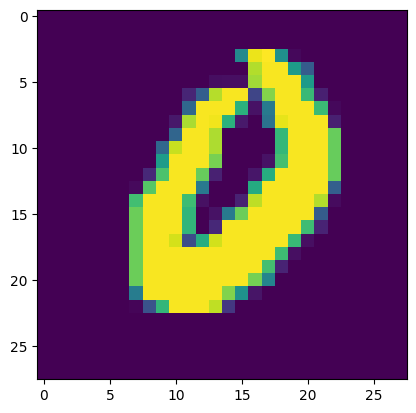

Output : 0


In [6]:
# displaying 5 random images from X_train with their corresponding outputs from Y_train
for i in range(5):
    num = random.randint(1, 60000)
    plt.imshow(X_train[num])
    plt.show()
    print(f"Output : {Y_train[num]}")

In [7]:
# Printing the unique values of our target
print(f"Target (Training data): {np.unique(Y_train)}")
print(f"Target (Testing data): {np.unique(Y_test)}")

Target (Training data): [0 1 2 3 4 5 6 7 8 9]
Target (Testing data): [0 1 2 3 4 5 6 7 8 9]


In [8]:
# scaling down the feature images
X_train = X_train/255
X_test = X_test/255

In [9]:
# checking if the features have been scaled down
print(X_train[5][10])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.70980392 0.98823529 0.98823529
 0.8627451  0.65490196 0.11764706 0.         0.         0.30196078
 0.98823529 0.98823529 0.23529412 0.         0.         0.
 0.         0.         0.         0.        ]


## Building The Neural Network

In [10]:
# settting up the layers of the neural network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

Flatten layer: This layer is the input layer of the model and is responsible for flattening the 28x28 input images into a 1D array of shape (784,). This allows the neural network to process the image data.


Dense layer: This is a fully connected layer with 50 units/neurons. It uses the ReLU activation function, which introduces non-linearity to the model. The output shape of this layer is (50,).


Another Dense layer: Similar to the previous layer, it also has 50 units with ReLU activation. The output shape remains (50,).


Final Dense layer: This is the output layer of the model, with 10 units representing the number of classes/categories in the problem. It uses the sigmoid activation function, which produces a value between 0 and 1 for each class, indicating the probability of the input belonging to that class. The output shape is (10,).

In [11]:
# Compiling the neural network
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

optimizer: This argument specifies the optimizer algorithm to be used during the training of the model. In this case, "Adam" is used, which is a popular optimization algorithm known for its efficiency and good performance in a wide range of deep learning tasks.


loss: This argument specifies the loss function to be used during the training of the model. "sparse_categorical_crossentropy" is chosen, which is suitable for multi-class classification problems where the target labels are integers.


metrics: This argument specifies the evaluation metrics to be used to assess the performance of the model. In this case, "accuracy" is chosen as the metric to monitor during training and evaluation. It represents the proportion of correctly classified samples.

In [12]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2985 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1391 - accuracy: 0.9594
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1021 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0812 - accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 2s 903us/step - loss: 0.0661 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0562 - accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0494 - accuracy: 0.9844
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0382 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0

X_train: This is the input training data, which should be a numpy array or a TensorFlow tensor. It contains the 60,000 training samples, each represented by a 28x28 image.


Y_train: These are the corresponding target labels for the training data. It should be a numpy array or a TensorFlow tensor with a shape of (60000,), containing the labels for the 60,000 training samples.


epochs: This argument specifies the number of times the model will iterate over the entire training dataset. In this case, the model will be trained for 10 epochs, meaning it will go through the training data 10 times.

## Evaluating the model

In [13]:
## Evaluating model with test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"loss : {loss}")
print(f"accuracy : {accuracy}")

313/313 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9733
loss : 0.10314574092626572
accuracy : 0.9732999801635742


We have a high accuracy on both the training and testing data which suggests that our model has learned the patterns and features in the training data effectively and is able to make accurate predictions on new, unseen data.

313/313 [==============================] - 0s 694us/step


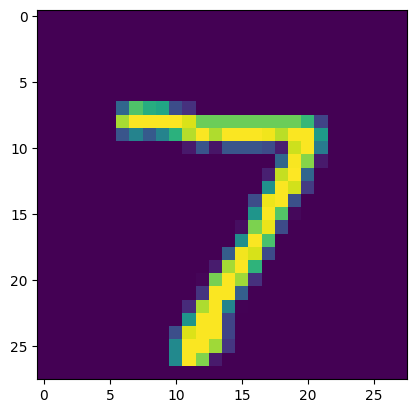

[2.0479201e-04 6.1157753e-04 1.7892720e-01 8.3304590e-01 4.1729052e-07
 5.6210808e-03 8.5552792e-09 9.9999666e-01 1.5944541e-02 2.5163609e-01]


In [14]:
# model.predict() gives the prediction probability of each class for that data point
Y_pred = model.predict(X_test)
plt.imshow(X_test[0])
plt.show()
print(Y_pred[0])

In [15]:
# converting the prediction probabilities to class labels
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [16]:
# making a pandas dataframe to display the comparison between the actual and predicted digit
comparison = pd.DataFrame()
comparison["Actual Digit"] = Y_test
comparison["Predicted Digit"] = np.argmax(Y_pred, axis=1)

In [17]:
# displaying 10 random rows of the comparison dataframe
comparison.sample(10)

,Actual Digit,Predicted Digit
2949,8,8
2142,8,8
6702,1,1
9019,7,2
996,2,2
7374,3,3
3255,1,1
2080,3,3
7533,7,7
9335,1,1


In [18]:
# confusion matrix 
cm = confusion_matrix(Y_test, np.argmax(Y_pred, axis=1))
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    5,    0,    1,    1,    2,    0,    4,    5],
       [   0, 1125,    3,    1,    0,    1,    2,    0,    3,    0],
       [   1,    1, 1017,    2,    1,    0,    0,    6,    3,    1],
       [   0,    1,   10,  977,    0,    2,    0,    5,    8,    7],
       [   1,    1,    3,    0,  949,    0,    5,    5,    1,   17],
       [   3,    1,    0,   22,    3,  842,    4,    1,    9,    7],
       [   4,    3,    3,    1,    7,    3,  930,    3,    4,    0],
       [   0,    4,   12,    1,    2,    0,    0,  997,    2,   10],
       [   3,    1,    6,    8,    7,    1,    0,    4,  940,    4],
       [   0,    4,    0,    3,    7,    0,    0,    1,    5,  989]])>

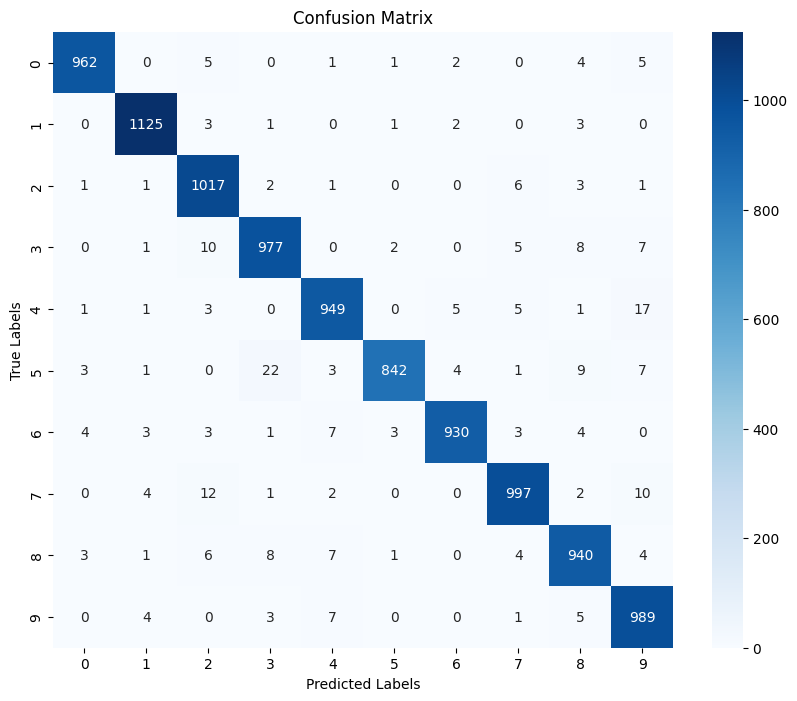

In [19]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
def preprocess_image(image):
    # Resize the image to 28x28 pixels
    image = Image.fromarray(image).resize((28, 28))
    # Convert the image to grayscale
    image = image.convert("L")
    # Convert the image to a NumPy array
    image = np.array(image)
    # Normalize the pixel values to the range of 0 to 1
    image = image / 255
    # Expand the dimensions to match the model's input shape
    image = np.expand_dims(image, axis=0)
    return image

In [21]:
def classify(image):
    # Preprocess or resize the image if needed
    preprocessed_image = preprocess_image(image)
    # Make a prediction using the model
    prediction = model.predict(preprocessed_image)
    predicted_label = np.argmax(prediction)
    return str(predicted_label)

In [22]:
# Define the Gradio interface
interface = gr.Interface(fn=classify, inputs="sketchpad", outputs="label")
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://5f4b1130d90e85af95.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 18ms/step
